In [ ]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\keena\Documents\University\python_scripts")

import Function_files.data_functions as dat
from Function_files.plotting_functions import plot_TPA
from TPA import plot_config as config_file

import matplotlib.pyplot as mp  
import os

In [44]:
directory = r"c:\Users\keena\Downloads\0730_TPA\resonant_2"
powers, durations = dat.extract_dirs(directory, 'power', 'duration')
jsons = []
for index, power in enumerate(powers):
        temp = []
        for duration in durations[index]:
                dir = os.path.join(directory, power, duration)
                temp.append(dat.read_json(os.path.join(dir, f'{duration}_CP_avg.json')))
        jsons.append(temp)

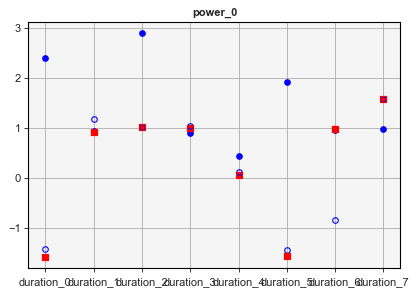

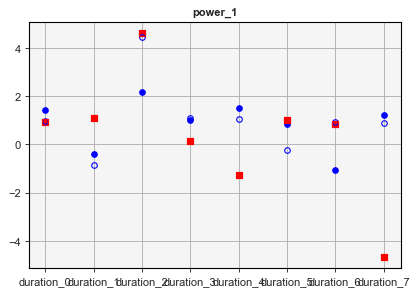

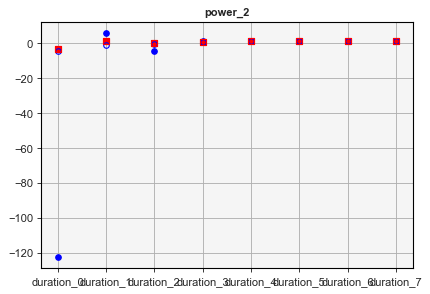

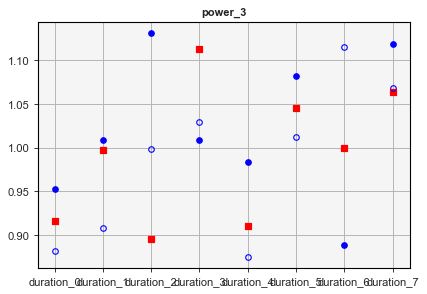

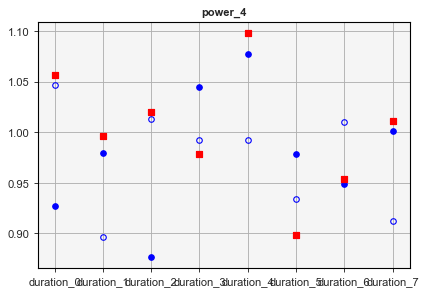

In [45]:
for index, power in enumerate(powers):
    fig, ax = mp.subplots()
    ax.set(title=(power))
    for json, duration in zip(jsons[index], durations[index]):
        ax.plot(duration, json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
        ax.plot(duration, json['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
        ax.plot(duration, json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
        ax.plot(duration, json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')


    

In [ ]:
# import config file dictionary
dir = os.path.join(config_file.root, "Resonant_3\\HP")
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interrogate(path=dir, extensions=config_file.extensions, exceptions=config_file.exceptions)
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# make paths and extract data
file_list = [file_list]
data_path_list = dat.search_paths(folder_list, file_list, config_file.extensions)
json_sets = [dat.read_json(os.path.join(dir, x)) for data_list in data_path_list for x in data_list]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP\1901_unlocked_HP_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p2GHz\1901_unlocked_HP_p2GHz_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p4GHz\1901_unlocked_HP_p4GHz_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_avg.json")
json_4 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_avg.json")
json_5 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_avg.json")

In [ ]:
# import config file dictionary
config = config_file.config_params
json_sets = [json, json_1, json_2, json_3, json_4, json_5]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

In [ ]:
import matplotlib.pyplot as mp

labels = ['-5 GHz', '-3 GHz', '0 GHz']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], data_values[1][0]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], data_values[1][0]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], data_values[1][1]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], data_values[1][1]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], data_values[1][2]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], data_values[1][2]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], data_values[1][3]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], data_values[1][3]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], data_values[1][4]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], data_values[1][4]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], data_values[1][5]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], data_values[1][5]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].legend([f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", 
              f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$"])

ax[0].set(title=('1550nm Power: 6.6mW'))
ax[1].set(title=('1550nm Power: 2.6mW'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP\1901_unlocked_HP_no_zero_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p2GHz\1901_unlocked_HP_p2GHz_no_zero_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p4GHz\1901_unlocked_HP_p4GHz_no_zero_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_no_zero_avg.json")
json_4 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_no_zero_avg.json")
json_5 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_no_zero_avg.json")

In [ ]:
# import config file dictionary
config = config_file.config_params
json_sets = [json, json_1, json_2, json_3, json_4, json_5]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

In [ ]:
import matplotlib.pyplot as mp

labels = ['-5 GHz', '-3 GHz', '0 GHz']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], data_values[1][0]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], data_values[1][0]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], data_values[1][1]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], data_values[1][1]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], data_values[1][2]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], data_values[1][2]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], data_values[1][3]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], data_values[1][3]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], data_values[1][4]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], data_values[1][4]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], data_values[1][5]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], data_values[1][5]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].legend([f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", 
              f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$"])

ax[0].set(title=('1550nm Power: 6.6mW'))
ax[1].set(title=('1550nm Power: 2.6mW'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses (No Zero)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_sgl.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_no_zero_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_no_zero_sgl.json")

In [ ]:
c_axis = dict(

cpf = 1,
cps = 2,
spf = 2,
sps = 1

)

In [ ]:
# 2404 resonant

labels = ['Zeroed Sgl', 'Zeroed Avg', 'Sgl', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[2], json_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[2], json_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[3], json_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[3], json_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (2404)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_sgl.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_no_zero_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_no_zero_sgl.json")

In [ ]:
# 2304 resonant

labels = ['Zeroed Sgl', 'Zeroed Avg', 'Sgl', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[2], json_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[2], json_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[3], json_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[3], json_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (2304)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant_2\Resonant_2_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant_2\Resonant_2_no_zero_avg.json")

In [ ]:
# 2304 resonant 2 (averaged traces)

labels = ['Zeroed Avg', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (2304 set 2)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1804_TPA\Resonant\Resonant_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1804_TPA\Resonant\Resonant_no_zero_avg.json")

In [ ]:
# 1804 resonant (averaged traces)

labels = ['Zeroed Avg', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (1804)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_no_zero_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_no_zero_avg.json")
json_4 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_avg.json")
json_5 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_no_zero_avg.json")

In [ ]:
# 1901 unlocked HP (averaged traces)

labels = labels = ['-5 GHz', '-3 GHz', '0 GHz']

fig, ax = mp.subplots()
ax.plot(labels[2], json['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[2], json['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[2], json['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[2], json['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.plot(labels[3], json_1['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[3], json_1['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[3], json_1['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[3], json_1['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.plot(labels[0], json['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (1901 UL Res)')

In [ ]:
dir_1 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0722_TPA\Resonant\HP"
j_1 = dat.read_json(os.path.join(dir_1, '5us', '5us_CP_avg.json'))
j_2 = dat.read_json(os.path.join(dir_1, '10us', '10us_CP_avg.json'))
j_3 = dat.read_json(os.path.join(dir_1, '20us', '20us_CP_avg.json'))
j_4 = dat.read_json(os.path.join(dir_1, '50us', '50us_CP_avg.json'))
dir_2 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0722_TPA\Resonant\LP"
j_5 = dat.read_json(os.path.join(dir_2, '5us', '5us_CP_avg.json'))
j_6 = dat.read_json(os.path.join(dir_2, '10us', '10us_CP_avg.json'))
j_7 = dat.read_json(os.path.join(dir_2, '20us', '20us_CP_avg.json'))
j_8 = dat.read_json(os.path.join(dir_2, '50us', '50us_CP_avg.json'))

In [ ]:
import matplotlib.pyplot as mp

labels = ['5us', '10us', '20us', '50us']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], j_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], j_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], j_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], j_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], j_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], j_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], j_4['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], j_4['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], j_5['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], j_5['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], j_6['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], j_6['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], j_7['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], j_7['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], j_8['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], j_8['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')


ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses (No Zero)')

In [ ]:
dir_1 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0723_TPA\Resonant\HP"
j_1 = dat.read_json(os.path.join(dir_1, '5us_0', '5us_0_CP_avg.json'))
j_2 = dat.read_json(os.path.join(dir_1, '5us_1', '5us_1_CP_avg.json'))
j_3 = dat.read_json(os.path.join(dir_1, '10us_0', '10us_0_CP_avg.json'))
j_4 = dat.read_json(os.path.join(dir_1, '10us_1', '10us_1_CP_avg.json'))
dir_2 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0723_TPA\Resonant\LP"
j_5 = dat.read_json(os.path.join(dir_2, '5us_0', '5us_0_CP_avg.json'))
j_6 = dat.read_json(os.path.join(dir_2, '5us_1', '5us_1_CP_avg.json'))
j_7 = dat.read_json(os.path.join(dir_2, '10us_0', '10us_0_CP_avg.json'))
j_8 = dat.read_json(os.path.join(dir_2, '10us_1', '10us_1_CP_avg.json'))

In [ ]:
import matplotlib.pyplot as mp

labels = ['5us_0', '10us_0', '5us_1us', '10us_1']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], j_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], j_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], j_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], j_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], j_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], j_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], j_4['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], j_4['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], j_5['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], j_5['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], j_6['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], j_6['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], j_7['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], j_7['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], j_8['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], j_8['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')


ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses (No Zero)')

In [ ]:
dir_1 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0723_TPA\Resonant_1\HP"
j_1 = dat.read_json(os.path.join(dir_1, '5us', '5us_CP_avg.json'))
j_2 = dat.read_json(os.path.join(dir_1, '10us', '10us_CP_avg.json'))
j_3 = dat.read_json(os.path.join(dir_1, '20us', '20us_CP_avg.json'))
j_4 = dat.read_json(os.path.join(dir_1, '50us', '50us_CP_avg.json'))
dir_2 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0723_TPA\Resonant_1\LP"
j_5 = dat.read_json(os.path.join(dir_2, '5us', '5us_CP_avg.json'))
j_6 = dat.read_json(os.path.join(dir_2, '10us', '10us_CP_avg.json'))
j_7 = dat.read_json(os.path.join(dir_2, '20us', '20us_CP_avg.json'))
j_8 = dat.read_json(os.path.join(dir_2, '50us', '50us_CP_avg.json'))

In [ ]:
import matplotlib.pyplot as mp

labels = ['5us', '10us', '20us', '50us']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], j_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], j_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], j_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], j_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], j_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], j_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], j_4['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], j_4['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], j_5['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], j_5['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], j_6['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], j_6['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], j_7['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], j_7['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], j_8['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], j_8['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')


ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses (No Zero)')

In [ ]:
dir_1 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0723_TPA\Resonant_2\HP"
j_1 = dat.read_json(os.path.join(dir_1, '5us', '5us_CP_avg.json'))
j_2 = dat.read_json(os.path.join(dir_1, '10us', '10us_CP_avg.json'))
j_3 = dat.read_json(os.path.join(dir_1, '20us', '20us_CP_avg.json'))
j_4 = dat.read_json(os.path.join(dir_1, '50us', '50us_CP_avg.json'))
dir_2 = r"c:\Users\sk88\Heriot-Watt University Team Dropbox\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\0723_TPA\Resonant_2\LP"
j_5 = dat.read_json(os.path.join(dir_2, '5us', '5us_CP_avg.json'))
j_6 = dat.read_json(os.path.join(dir_2, '10us', '10us_CP_avg.json'))
j_7 = dat.read_json(os.path.join(dir_2, '20us', '20us_CP_avg.json'))
j_8 = dat.read_json(os.path.join(dir_2, '50us', '50us_CP_avg.json'))

In [ ]:
import matplotlib.pyplot as mp

labels = ['5us', '10us', '20us', '50us']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], j_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], j_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], j_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], j_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], j_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], j_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], j_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], j_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], j_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], j_4['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], j_4['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], j_4['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], j_5['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], j_5['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], j_5['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], j_6['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], j_6['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], j_6['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], j_7['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], j_7['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], j_7['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], j_8['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], j_8['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], j_8['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')


ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses (No Zero)')

In [ ]:
folders = ["1us", "2us", "3us", "4us", "5us", "6us", "7us", "8us", "9us", "10us"]

root = os.path.join(config_file.root, config_file.file)
json = []
for folder in folders:
    file = f'{folder}\\{folder}_CP_avg.json'
    json.append(dat.read_json(os.path.join(root, file)))

In [ ]:
folders = ["1us", "2us", "3us", "4us", "5us", "6us", "7us", "8us", "9us", "10us"]

root = os.path.join(config_file.root, r"Resonant_3\LP")
json_2 = []
for folder in folders:
    file = f'{folder}\\{folder}_CP_avg.json'
    json_2.append(dat.read_json(os.path.join(root, file)))

In [ ]:
c_axis = dict(

cpf = 1,
cps = 2,
spf = 2,
sps = 1

)

In [ ]:
import matplotlib.pyplot as mp

labels = ["1us", "2us", "3us", "4us", "5us", "6us", "7us", "8us", "9us", "10us"]
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))
fig.set_size_inches(10, 8)

ax[0].plot(labels[0], json[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], json[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], json[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], json[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], json[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], json[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], json[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], json[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], json[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], json[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], json[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], json[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], json[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], json[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], json[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], json[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[4], json[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[4], json[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[4], json[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[4], json[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[5], json[5]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[5], json[5]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[5], json[5]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[5], json[5]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[6], json[6]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[6], json[6]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[6], json[6]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[6], json[6]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[7], json[7]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[7], json[7]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[7], json[7]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[7], json[7]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[8], json[8]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[8], json[8]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[8], json[8]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[8], json[8]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[9], json[9]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[9], json[9]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[9], json[9]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[9], json[9]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], json_2[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], json_2[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], json_2[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], json_2[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[4], json_2[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[5], json_2[5]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[5], json_2[5]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[5], json_2[5]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[5], json_2[5]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[6], json_2[6]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[6], json_2[6]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[6], json_2[6]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[6], json_2[6]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[7], json_2[7]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[7], json_2[7]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[7], json_2[7]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[7], json_2[7]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[8], json_2[8]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[8], json_2[8]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[8], json_2[8]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[8], json_2[8]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[9], json_2[9]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[9], json_2[9]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[9], json_2[9]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[9], json_2[9]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses')

In [ ]:
folders = ["1us_0", "1us_1", "1us_2", "1us_3", "1us_4", "1us_5", "1us_6", "1us_7", "1us_8", "1us_9"]

root = os.path.join(config_file.root, r"Resonant_4\HP")
json = []
for folder in folders:
    file = f'{folder}\\{folder}_CP_avg.json'
    json.append(dat.read_json(os.path.join(root, file)))

root = os.path.join(config_file.root, r"Resonant_4\LP")
json_2 = []
for folder in folders:
    file = f'{folder}\\{folder}_CP_avg.json'
    json_2.append(dat.read_json(os.path.join(root, file)))

In [ ]:
import matplotlib.pyplot as mp

labels = ["1us_0", "1us_1", "1us_2", "1us_3", "1us_4", "1us_5", "1us_6", "1us_7", "1us_8", "1us_9"]
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))
fig.set_size_inches(10, 8)

ax[0].plot(labels[0], json[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], json[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], json[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], json[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], json[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], json[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], json[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], json[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], json[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], json[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], json[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], json[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], json[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], json[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], json[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], json[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[4], json[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[4], json[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[4], json[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[4], json[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[5], json[5]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[5], json[5]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[5], json[5]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[5], json[5]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[6], json[6]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[6], json[6]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[6], json[6]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[6], json[6]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[7], json[7]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[7], json[7]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[7], json[7]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[7], json[7]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[8], json[8]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[8], json[8]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[8], json[8]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[8], json[8]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[9], json[9]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[9], json[9]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[9], json[9]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[9], json[9]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], json_2[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], json_2[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], json_2[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], json_2[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[4], json_2[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[5], json_2[5]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[5], json_2[5]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[5], json_2[5]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[5], json_2[5]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[6], json_2[6]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[6], json_2[6]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[6], json_2[6]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[6], json_2[6]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[7], json_2[7]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[7], json_2[7]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[7], json_2[7]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[7], json_2[7]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[8], json_2[8]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[8], json_2[8]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[8], json_2[8]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[8], json_2[8]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[9], json_2[9]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[9], json_2[9]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[9], json_2[9]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[9], json_2[9]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses')

In [ ]:
folders = ["1us_0", "1us_1", "1us_2", "1us_3", "1us_4"]

root = os.path.join(config_file.root, r"Resonant_5\HP")
json = []
for folder in folders:
    file = f'{folder}\\{folder}_CP_avg.json'
    json.append(dat.read_json(os.path.join(root, file)))

root = os.path.join(config_file.root, r"Resonant_5\LP")
json_2 = []
for folder in folders:
    file = f'{folder}\\{folder}_CP_avg.json'
    json_2.append(dat.read_json(os.path.join(root, file)))

In [ ]:
import matplotlib.pyplot as mp

labels = ["1us_0", "1us_1", "1us_2", "1us_3", "1us_4"]
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))
fig.set_size_inches(10, 8)

ax[0].plot(labels[0], json[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], json[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], json[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], json[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], json[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], json[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], json[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], json[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], json[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], json[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], json[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], json[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], json[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], json[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], json[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], json[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[4], json[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[4], json[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[4], json[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[4], json[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], json_2[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], json_2[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], json_2[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], json_2[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[4], json_2[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('1550nm Power: High'))
ax[1].set(title=('1550nm Power: Low'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses')

#### 0729_TPA sweep

In [ ]:
path = r'c:\Users\keena\Downloads\0729_TPA'

powers = ['power_0','power_1','power_2','power_3', 'power_4']

json_1 = []
json_2 = []
for power in powers:
    root = os.path.join(path, power)
    json_1.append(dat.read_json(os.path.join(root, r'duration_0\duration_0_CP_avg.json')))
    json_2.append(dat.read_json(os.path.join(root, r'duration_3\duration_3_CP_avg.json')))

In [ ]:
import matplotlib.pyplot as mp

labels = ['power_0','power_1','power_2','power_3', 'power_4']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))
fig.set_size_inches(10, 8)

ax[0].plot(labels[0], json_1[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], json_1[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], json_1[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], json_1[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], json_1[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], json_1[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], json_1[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], json_1[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], json_1[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], json_1[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], json_1[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], json_1[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[3], json_1[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[3], json_1[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[3], json_1[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[3], json_1[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[4], json_1[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[4], json_1[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[4], json_1[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[4], json_1[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], json_2[0]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], json_2[0]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], json_2[1]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], json_2[1]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], json_2[2]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], json_2[2]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[3], json_2[3]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[3], json_2[3]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[4], json_2[4]['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[4], json_2[4]['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax[0].legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax[0].set(title=('Pulse Duration 1$\mu$s'))
ax[1].set(title=('Pulse Duration 10$\mu$s'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Power Increasing')
fig.supylabel('Transmission of 995nm Pulses')